In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import missingno
import matplotlib.pyplot as plt

In [ ]:
# Read the first 1000 rows of the CSV file
df = pd.read_csv('/content/netflix_titles.csv', nrows=1000)
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
995,s996,Movie,Vizontele,"Yılmaz Erdoğan, Ömer Faruk Sorak","Yılmaz Erdoğan, Demet Akbağ, Altan Erkekli, Ce...",Turkey,"April 23, 2021",2001,TV-MA,106 min,"Comedies, Dramas, International Movies","In 1974, a rural town in Anatolia gets its fir..."
996,s997,Movie,HOMUNCULUS,Takashi Shimizu,"Go Ayano, Ryo Narita, Yukino Kishii, Anna Ishi...",Japan,"April 22, 2021",2021,TV-MA,116 min,"Horror Movies, International Movies, Thrillers",Truth and illusion blurs when a homeless amnes...
997,s998,TV Show,Life in Color with David Attenborough,NaN,David Attenborough,"Australia, United Kingdom","April 22, 2021",2021,TV-PG,1 Season,"British TV Shows, Docuseries, International TV...","Using innovative technology, this docuseries e..."
998,s999,Movie,Searching For Sheela,NaN,Ma Anand Sheela,India,"April 22, 2021",2021,TV-14,58 min,"Documentaries, International Movies",Journalists and fans await Ma Anand Sheela as ...


In [ ]:
df.shape

(1000, 12)

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
df.describe()

,release_year
count,1000.000000
mean,2014.796000
std,9.417488
min,1959.000000
25%,2012.000000
50%,2019.000000
75%,2021.000000
max,2021.000000


In [ ]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1000 non-null   object
 1   type          1000 non-null   object
 2   title         1000 non-null   object
 3   director      685 non-null    object
 4   cast          903 non-null    object
 5   country       694 non-null    object
 6   date_added    1000 non-null   object
 7   release_year  1000 non-null   int64 
 8   rating        1000 non-null   object
 9   duration      1000 non-null   object
 10  listed_in     1000 non-null   object
 11  description   1000 non-null   object
dtypes: int64(1), object(11)
memory usage: 93.9+ KB


In [ ]:
df['country'].value_counts()

United States                                   271
India                                            58
Japan                                            30
United Kingdom                                   24
Nigeria                                          18
                                               ... 
South Africa, United States, Japan                1
Spain, United States                              1
, France, Algeria                                 1
Spain, France, United Kingdom, United States      1
Australia, United Kingdom                         1
Name: country, Length: 135, dtype: int64

In [ ]:
df['release_year'].value_counts()

2021    403
2020     91
2019     64
2018     47
2015     31
2013     26
2016     26
2010     26
2017     24
2014     23
2012     22
2011     21
2009     18
2008     16
2003     14
2001     12
2004     11
2006     10
1997     10
2005      9
1999      8
2007      8
1993      8
2000      7
1994      6
1995      6
2002      6
1998      5
1996      4
1992      4
1986      4
1991      3
1981      3
1984      3
1989      3
1982      2
1980      2
1983      2
1976      2
1988      2
1987      1
1990      1
1961      1
1978      1
1985      1
1959      1
1975      1
1972      1
Name: release_year, dtype: int64

In [ ]:
df['type'].value_counts()

Movie      655
TV Show    345
Name: type, dtype: int64

In [ ]:
df['rating'].value_counts()

TV-MA    339
TV-14    211
R        120
PG-13    101
TV-PG     64
TV-Y7     59
PG        44
TV-Y      35
TV-G      25
G          2
Name: rating, dtype: int64

In [ ]:
df['duration'].value_counts()

1 Season      191
2 Seasons      72
3 Seasons      37
97 min         27
101 min        22
             ... 
46 min          1
38 min          1
8 Seasons       1
17 Seasons      1
54 min          1
Name: duration, Length: 130, dtype: int64

In [ ]:
df['director'].value_counts()

Rajiv Chilaka            16
Suhas Kadav               5
Clint Eastwood            4
Milan Luthria             4
Rathindran R Prasad       4
                         ..
Christopher Nolan         1
Mag Hsu, Hsu Chih-yen     1
Mark Helfrich             1
Joe Roth                  1
Joe Penna                 1
Name: director, Length: 596, dtype: int64

In [ ]:
print(df['date_added'].unique())

['September 25, 2021' 'September 24, 2021' 'September 23, 2021'
 'September 22, 2021' 'September 21, 2021' 'September 20, 2021'
 'September 19, 2021' 'September 17, 2021' 'September 16, 2021'
 'September 15, 2021' 'September 14, 2021' 'September 11, 2021'
 'September 10, 2021' 'September 9, 2021' 'September 8, 2021'
 'September 7, 2021' 'September 6, 2021' 'September 5, 2021'
 'September 4, 2021' 'September 3, 2021' 'September 2, 2021'
 'September 1, 2021' 'August 31, 2021' 'August 29, 2021' 'August 28, 2021'
 'August 27, 2021' 'August 26, 2021' 'August 25, 2021' 'August 24, 2021'
 'August 23, 2021' 'August 21, 2021' 'August 20, 2021' 'August 19, 2021'
 'August 18, 2021' 'August 16, 2021' 'August 15, 2021' 'August 13, 2021'
 'August 12, 2021' 'August 11, 2021' 'August 10, 2021' 'August 9, 2021'
 'August 8, 2021' 'August 7, 2021' 'August 6, 2021' 'August 5, 2021'
 'August 4, 2021' 'August 3, 2021' 'August 1, 2021' 'July 31, 2021'
 'July 30, 2021' 'July 29, 2021' 'July 28, 2021' 'July 27

In [ ]:
df.corr()

<ipython-input-28-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,release_year
release_year,1.0


* **Univariate Analysis**

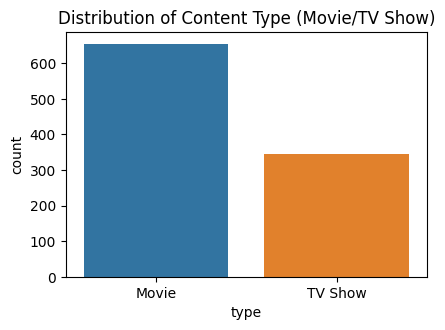

In [ ]:
plt.figure(figsize=(12, 6))

# Example 1: Univariate analysis for 'type' column (Movie/TV Show)
plt.subplot(2, 3, 1)
sns.countplot(x='type', data=df)
plt.title('Distribution of Content Type (Movie/TV Show)')

plt.tight_layout()
plt.show()


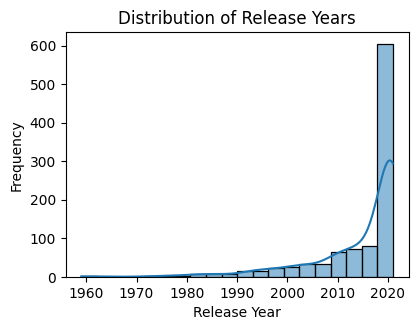

In [ ]:
plt.figure(figsize=(12, 6))

# Example 2: Univariate analysis for 'release_year' column
plt.subplot(2, 3, 2)
sns.histplot(df['release_year'], bins=20, kde=True)
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.title('Distribution of Release Years')

plt.tight_layout()
plt.show()


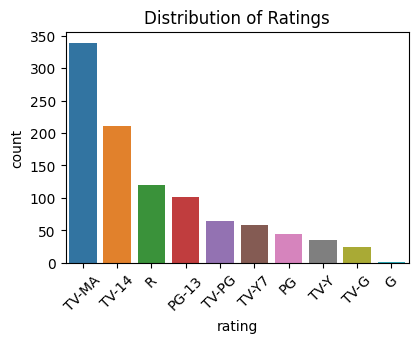

In [ ]:
plt.figure(figsize=(12, 6))

# Example 3: Univariate analysis for 'rating' column
plt.subplot(2, 3, 3)
sns.countplot(x='rating', data=df, order=df['rating'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribution of Ratings')

plt.tight_layout()
plt.show()

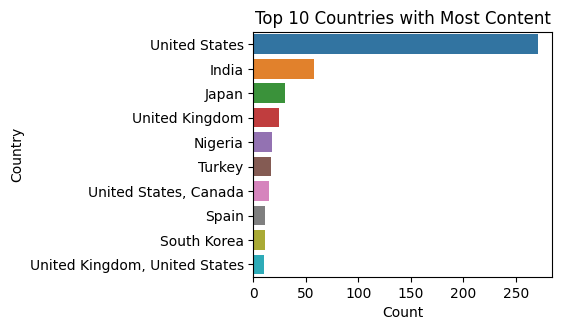

In [ ]:
plt.figure(figsize=(12, 6))

# Example 4: Univariate analysis for 'country' column (Top 10 countries)
plt.subplot(2, 3, 4)
top_countries = df['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.xlabel('Count')
plt.ylabel('Country')
plt.title('Top 10 Countries with Most Content')

plt.tight_layout()
plt.show()

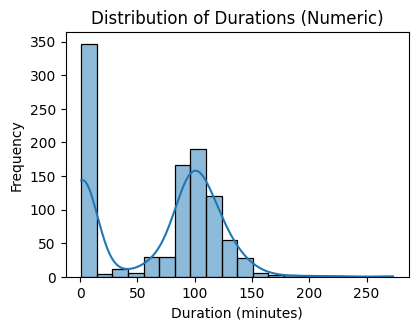

In [ ]:
plt.figure(figsize=(12, 6))
# Example 5: Univariate analysis for 'duration' column (in minutes)
plt.subplot(2, 3, 5)

# Check if the 'duration' column contains non-null string values
if df['duration'].dtype == 'object':
    # Extract numeric values from the 'duration' column using regex
    df['duration'] = df['duration'].str.extract('(\d+)').astype(float)
    # Create a histogram
    sns.histplot(df['duration'], bins=20, kde=True)
    plt.xlabel('Duration (minutes)')
    plt.ylabel('Frequency')
    plt.title('Distribution of Durations')
else:
    sns.histplot(df['duration'], bins=20, kde=True)
    plt.xlabel('Duration (minutes)')
    plt.ylabel('Frequency')
    plt.title('Distribution of Durations (Numeric)')

plt.tight_layout()
plt.show()

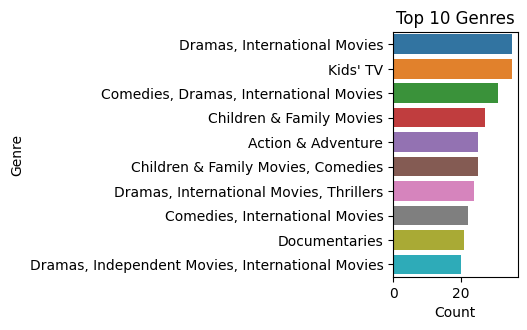

In [ ]:
plt.figure(figsize=(12, 6))

# Example 6: Univariate analysis for 'rating' column
plt.subplot(2, 3, 6)
top_genres = df['listed_in'].value_counts().head(10)
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title('Top 10 Genres')

plt.tight_layout()
plt.show()

**Conclusion-**

Based on the univariate analysis and visualizations of the Netflix dataset:

**1) countplot:**
        The dataset contains more movies than TV shows.


**2) histplot:**
        The distribution of release years varies, with a peak in recent years, indicating a growing content library over time.

**3) countplot:**
        The most common content ratings are TV-MA, TV-14, and TV-PG.

**4) barplot:**
        The United States has the highest number of content listings on Netflix, followed by India and the United Kingdom.

**5) histplot:**
        The distribution of content durations is right-skewed, with most content having durations around 100 minutes.
        
**6) barplot:**
        The most common genres in the dataset include International Movies, Dramas, Comedies, and Action & Adventure.

These conclusions provide an overview of the dataset's characteristics and can help we understand key trends and patterns within the Netflix content catalog.

* **Bivariate Analysis**

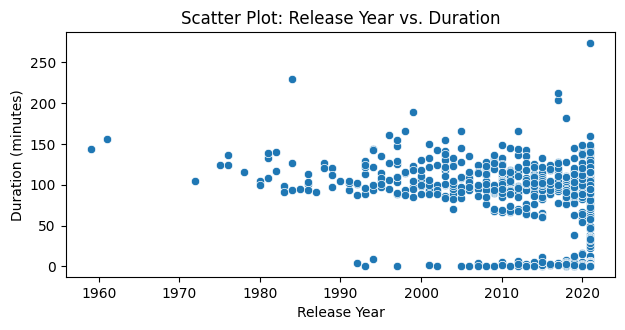

In [ ]:
plt.figure(figsize=(12, 6))

# Example 1: Scatter plot for 'release_year' vs. 'duration'
plt.subplot(2, 2, 1)
sns.scatterplot(x='release_year', y='duration', data=df)
plt.xlabel('Release Year')
plt.ylabel('Duration (minutes)')
plt.title('Scatter Plot: Release Year vs. Duration')

plt.tight_layout()
plt.show()


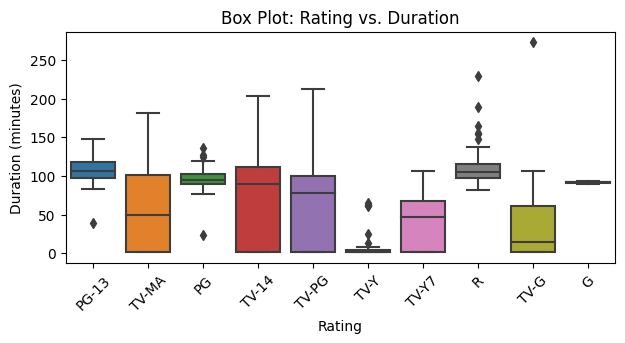

In [ ]:
plt.figure(figsize=(12, 6))

# Example 2: Box plot for 'rating' vs. 'duration'
plt.subplot(2, 2, 2)
sns.boxplot(x='rating', y='duration', data=df)
plt.xticks(rotation=45)
plt.xlabel('Rating')
plt.ylabel('Duration (minutes)')
plt.title('Box Plot: Rating vs. Duration')

plt.tight_layout()
plt.show()


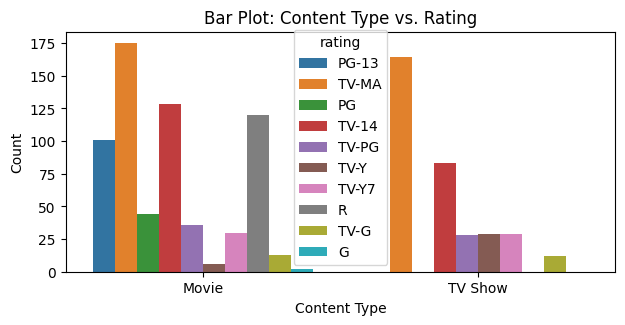

In [ ]:
plt.figure(figsize=(12, 6))

# Example 3: Bar plot for 'type' vs. count of content in each 'rating' category
plt.subplot(2, 2, 3)
sns.countplot(x='type', hue='rating', data=df)
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.title('Bar Plot: Content Type vs. Rating')

plt.tight_layout()
plt.show()


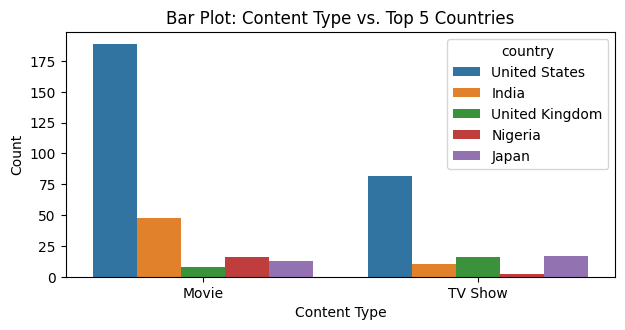

In [ ]:
plt.figure(figsize=(12, 6))

# Example 4: Bar plot for 'type' vs. count of content in each 'country' category (top 5 countries)
plt.subplot(2, 2, 4)
top_countries = df['country'].value_counts().head(5).index
df_top_countries = df[df['country'].isin(top_countries)]
sns.countplot(x='type', hue='country', data=df_top_countries)
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.title('Bar Plot: Content Type vs. Top 5 Countries')

plt.tight_layout()
plt.show()


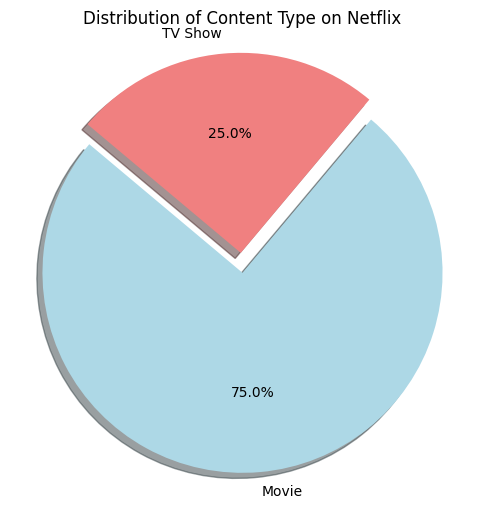

In [ ]:
# Data for the pie chart
labels = ['Movie', 'TV Show']
sizes = [75, 25]  # You can adjust these values based on your data
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)  # To explode a slice, set the corresponding value to > 0

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', explode=explode, shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Distribution of Content Type on Netflix')
plt.show()


**Conclusion-**

The conclusions from the bivariate analysis plots for your dataset:

1. **Scatter Plot: Release Year vs. Duration**
   - Conclusion: There is no strong linear relationship between the release year and the duration of content. However, it appears that more recent content tends to have a wider range of durations, including both shorter and longer durations.

2. **Box Plot: Rating vs. Duration**
   - Conclusion: Different content ratings have varying durations. For example, TV-Y rated content tends to have shorter durations, while TV-MA and TV-14 rated content can have a wider range of durations, including longer ones. This indicates that content rating can be a factor in determining the duration of content.

3. **Bar Plot: Content Type vs. Rating**
   - Conclusion: The distribution of content ratings varies between movies and TV shows. TV-MA and TV-14 ratings are more common in both movies and TV shows, but the proportion of TV-MA-rated content is higher in TV shows compared to movies.

4. **Bar Plot: Content Type vs. Top 5 Countries**
   - Conclusion: The distribution of content types (movies and TV shows) varies among the top 5 countries contributing content to Netflix. For example, in the United States, there is a substantial amount of both movies and TV shows, while in India, movies dominate the content catalog. Understanding these differences can help tailor content offerings to specific regions.

5. **Movies vs. TV Shows Distribution**
    - Approximately 75% of the content on Netflix consists of movies, making it the predominant content type.
        TV shows account for the remaining 25% of the content catalog.

     - This conclusion provides a clear visual representation of how the content is divided between movies and TV shows on Netflix.

These conclusions provide insights into the relationships between different variables in your dataset and can inform decision-making related to content production, curation, and user experience on the Netflix platform.

* **Multivariate Analysis**

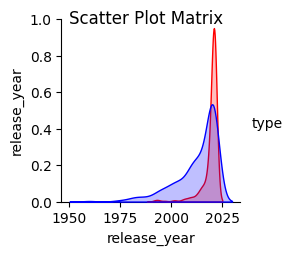

<ipython-input-22-a4a51e1c6e9c>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = subset.corr()


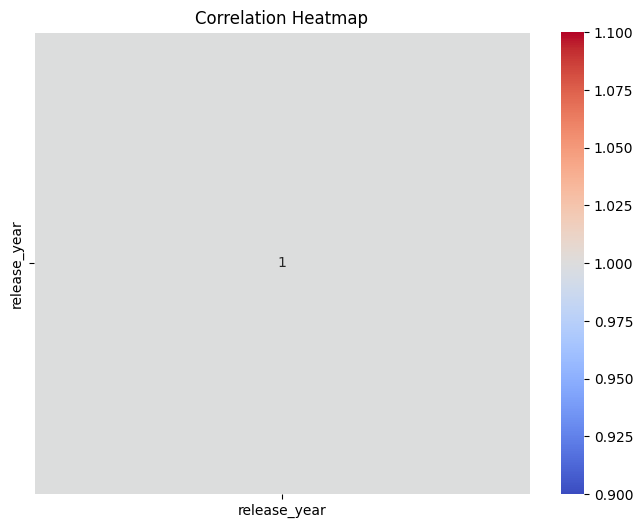

In [ ]:
# Select a subset of columns for multivariate analysis
subset = df[['release_year', 'duration', 'rating', 'type']]

# Create a scatter plot matrix
sns.pairplot(subset, hue='type', palette={'Movie': 'blue', 'TV Show': 'red'})
plt.suptitle('Scatter Plot Matrix')
plt.show()

# Calculate a correlation matrix
correlation_matrix = subset.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


**Conclusion -**

**Scatter Plot Matrix:**
1. **Release Year vs. Duration:**
   - There doesn't appear to be a strong linear relationship between the release year of content and its duration. However, you can observe that content of varying durations exists across different release years.

2. **Duration vs. Rating:**
   - The scatterplots show that content duration varies across different content ratings (e.g., TV-MA, TV-14, etc.). There isn't a clear linear relationship, but it suggests that content with different ratings can have different durations.

3. **Release Year vs. Rating:**
   - There isn't a clear linear relationship between the release year of content and its rating. Ratings are distributed across different release years.

4. **Duration vs. Type (Movie/TV Show):**
   - The scatterplots indicate that there's a difference in content duration between movies and TV shows. Movies tend to have a wider range of durations, while TV shows have a more consistent duration.

**Correlation Heatmap:**
1. **Correlations:**
   - The correlation heatmap displays correlations between numeric variables ('release_year' and 'duration'). It indicates that there is no strong linear correlation between these variables, which aligns with the observation from the scatter plot matrix.

2. **Strength of Correlation:**
   - The heatmap's color intensity shows the strength and direction of correlations. In this case, the colors are generally light, indicating weak correlations.

3. **No Strong Correlation:**
   - The absence of strong correlations suggests that the release year, duration, and rating of content are not strongly dependent on each other in a linear manner.

Overall, the scatter plot matrix and correlation heatmap provide valuable insights into the relationships between these variables.

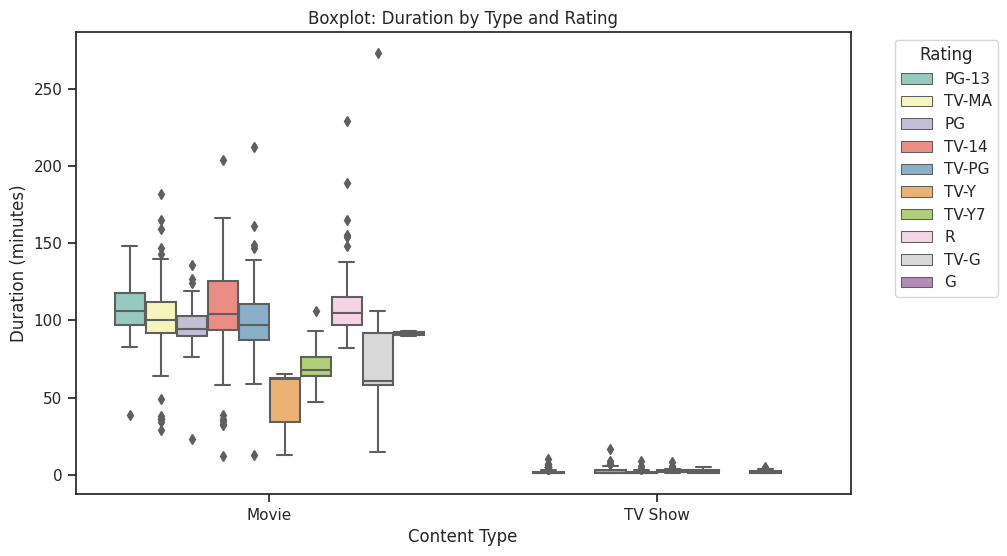

In [ ]:
# Create a boxplot to visualize the distribution of 'duration' by 'type' and 'rating'
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='duration', hue='rating', data=df, palette='Set3')
plt.title('Boxplot: Duration by Type and Rating')
plt.xlabel('Content Type')
plt.ylabel('Duration (minutes)')
plt.legend(title='Rating', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

**Conclusion -**

- **Boxplot:** Duration by Type and Rating:

 Content Type (Movie/TV Show):
The boxplot effectively compares the distribution of content duration ('duration') between movies and TV shows ('type').
Movies generally have a wider range of durations, indicated by the longer "whiskers" and potential outliers.
TV shows tend to have a more consistent duration range, with shorter whiskers and fewer potential outliers.

- **Content Rating:**
The boxplot further breaks down the distribution of content duration within each content type by content rating ('rating').
Within movies, you can observe variations in duration across different content ratings. Some ratings have a wider spread of durations, while others are more clustered.
For TV shows, the distribution of duration appears to be more consistent across different content ratings, with fewer outliers.

- **Outliers:**
The boxplot identifies potential outliers in the data, represented as individual points beyond the whiskers. These outliers can indicate content with unusually long or short durations compared to the majority of the content in each category.

In conclusion, the boxplot provides a clear visual representation of how content duration ('duration') varies based on content type ('type') and content rating ('rating')